## Exploratory Data Analysis (EDA) on Telecommunications Data

### Data Extraction

In [1]:
import os
os.chdir('..')
from src.dbconnection import get_dataFrame_from_database

#### Extract telecommunications data from the XDR_data table

In [2]:
xdr_data = get_dataFrame_from_database()

In [3]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### Number of rows and columns

In [4]:
print("rows=", xdr_data.shape[0], "columns=", xdr_data.shape[1])

rows= 150001 columns= 55


### Find any missing values

In [5]:
import pandas as pd
def find_missing_values(df):
    """
    Finds missing values and returns a summary.

    Args:
        df: The DataFrame to check for missing values.

    Returns:
        A summary of missing values, including the number of missing values per column.
    """

    missing_data = df.isnull().sum()
    missing_data_summary = pd.DataFrame({'Missing Values': missing_data})
    # missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

    return missing_data_summary
missing_summary = find_missing_values(xdr_data)
missing_summary.head(missing_summary.size)

,Missing Values
Bearer Id,991
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,1153


In [6]:
def replace_missing_values(data):
  """
  Replaces missing values in a DataFrame with the mean for numeric columns and the mode for categorical columns.

  Args:
    data: The input DataFrame.

  Returns:
    The DataFrame with missing values replaced.
  """

  # Identify numeric and categorical columns
  numeric_columns = data.select_dtypes(include='number').columns
  categorical_columns = data.select_dtypes(include='object').columns

  # Replace missing values in numeric columns with the mean
  for column in numeric_columns:
    column_mean = data[column].mean()
    data[column] = data[column].fillna(column_mean)

  # Replace missing values in categorical columns with the mode
  for column in categorical_columns:
    column_mode = data[column].mode().iloc[0]
    data[column] = data[column].fillna(column_mode)

  return data

xdr_data=replace_missing_values(xdr_data)

In [7]:
missing_summary = find_missing_values(xdr_data)
missing_summary.head(missing_summary.size)

,Missing Values
Bearer Id,0
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,0


In [8]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Find  outliers

In [9]:
def find_outliers(data, column_name):
    """
    Finds outliers in a given column of a DataFrame using the IQR method.

    Args:
        data: The input DataFrame.
        column_name (str): The name of the column to check for outliers.
    """

    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    # return outliers
    print(f"Outliers in {column_name}: {outliers.shape[0]}")

def remove_outliers_winsorization(data, column_names):
    """
    Removes outliers from specified columns of a DataFrame using winsorization.

    Args:
        data: The input DataFrame.
        column_names (list): A list of column names to process.

    Returns:
        The DataFrame with outliers removed.
    """

    for column_name in column_names:
        q1 = data[column_name].quantile(0.25)
        q3 = data[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data[column_name] = data[column_name].clip(lower_bound, upper_bound)

    return data


In [10]:

find_outliers(xdr_data, 'Total DL (Bytes)')
find_outliers(xdr_data, 'Dur. (ms)')
find_outliers(xdr_data, 'Start ms')
find_outliers(xdr_data, 'Bearer Id')

find_outliers(xdr_data, 'Social Media DL (Bytes)')
find_outliers(xdr_data, 'Social Media UL (Bytes)')
find_outliers(xdr_data, 'Email DL (Bytes)')
find_outliers(xdr_data, 'Email UL (Bytes)')
find_outliers(xdr_data, 'Youtube UL (Bytes)')
find_outliers(xdr_data, 'Youtube DL (Bytes)')
find_outliers(xdr_data, 'Total DL (Bytes)')
find_outliers(xdr_data, 'Total UL (Bytes)')
find_outliers(xdr_data, 'Other UL (Bytes)')
find_outliers(xdr_data, 'Other DL (Bytes)')
find_outliers(xdr_data, 'Gaming UL (Bytes)')
find_outliers(xdr_data, 'Gaming DL (Bytes)')
find_outliers(xdr_data, 'Netflix UL (Bytes)')
find_outliers(xdr_data, 'Netflix DL (Bytes)')

find_outliers(xdr_data, 'Avg RTT DL (ms)')
find_outliers(xdr_data, 'Avg RTT UL (ms)')
find_outliers(xdr_data, 'Nb of sec with 37500B < Vol UL')
find_outliers(xdr_data, 'TCP DL Retrans. Vol (Bytes)')
find_outliers(xdr_data, 'TCP UL Retrans. Vol (Bytes)')
find_outliers(xdr_data, 'Nb of sec with 125000B < Vol DL')
find_outliers(xdr_data, 'Nb of sec with 1250B < Vol UL < 6250B')
find_outliers(xdr_data, 'Nb of sec with 31250B < Vol DL < 125000B')
find_outliers(xdr_data, 'Nb of sec with 6250B < Vol DL < 31250B')
find_outliers(xdr_data, 'Nb of sec with 6250B < Vol UL < 37500B')




Outliers in Total DL (Bytes): 0
Outliers in Dur. (ms): 7184
Outliers in Start ms: 0
Outliers in Bearer Id: 0
Outliers in Social Media DL (Bytes): 0
Outliers in Social Media UL (Bytes): 0
Outliers in Email DL (Bytes): 0
Outliers in Email UL (Bytes): 0
Outliers in Youtube UL (Bytes): 0
Outliers in Youtube DL (Bytes): 0
Outliers in Total DL (Bytes): 0
Outliers in Total UL (Bytes): 243
Outliers in Other UL (Bytes): 0
Outliers in Other DL (Bytes): 0
Outliers in Gaming UL (Bytes): 0
Outliers in Gaming DL (Bytes): 0
Outliers in Netflix UL (Bytes): 0
Outliers in Netflix DL (Bytes): 0
Outliers in Avg RTT DL (ms): 7718
Outliers in Avg RTT UL (ms): 8975
Outliers in Nb of sec with 37500B < Vol UL: 19747
Outliers in TCP DL Retrans. Vol (Bytes): 2525
Outliers in TCP UL Retrans. Vol (Bytes): 1320
Outliers in Nb of sec with 125000B < Vol DL: 7760
Outliers in Nb of sec with 1250B < Vol UL < 6250B: 5770
Outliers in Nb of sec with 31250B < Vol DL < 125000B: 9173
Outliers in Nb of sec with 6250B < Vol DL 

### Box Plot before remove outlier

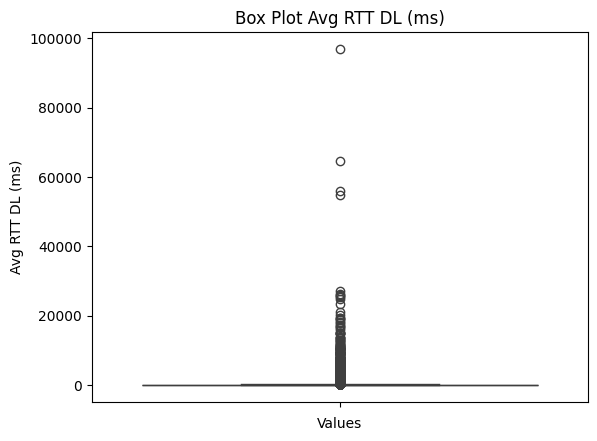

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=xdr_data['Avg RTT DL (ms)'], orient='v')
plt.title('Box Plot Avg RTT DL (ms)')
plt.xlabel('Values')
plt.ylabel('Avg RTT DL (ms)')
plt.show()

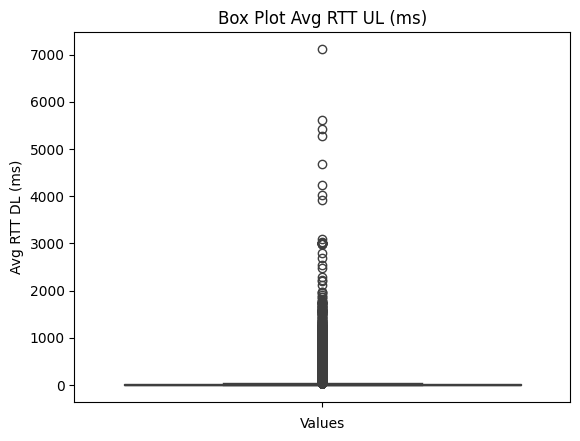

In [12]:
sns.boxplot(data=xdr_data['Avg RTT UL (ms)'], orient='v')
plt.title('Box Plot Avg RTT UL (ms)')
plt.xlabel('Values')
plt.ylabel('Avg RTT DL (ms)')
plt.show()

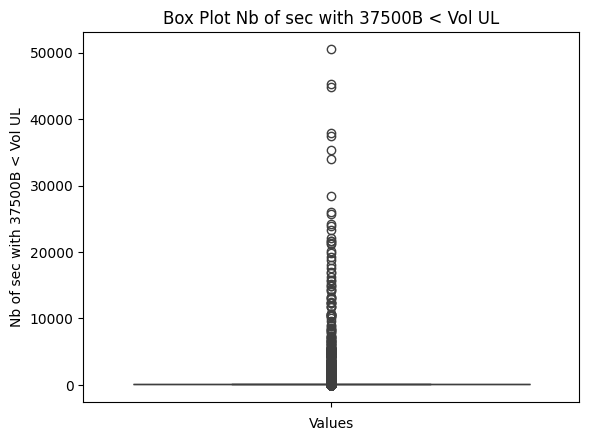

In [13]:
sns.boxplot(data=xdr_data['Nb of sec with 37500B < Vol UL'], orient='v')
plt.title('Box Plot Nb of sec with 37500B < Vol UL')
plt.xlabel('Values')
plt.ylabel('Nb of sec with 37500B < Vol UL')
plt.show()

### Box Plot After remove Outlier

In [14]:
# Remove outliers using winsorization
remove_outliers=remove_outliers_winsorization(xdr_data, ['Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with 37500B < Vol UL'])

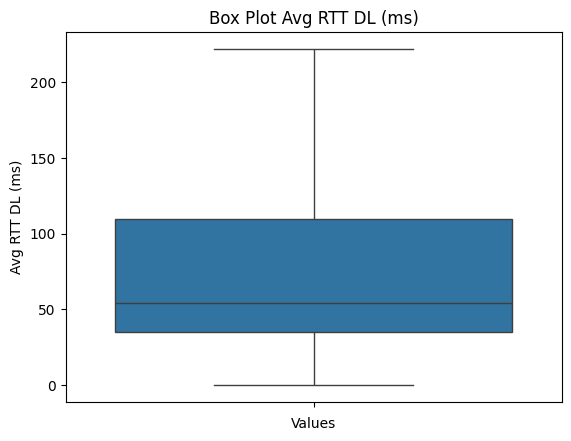

In [15]:
sns.boxplot(data=xdr_data['Avg RTT DL (ms)'], orient='v')
plt.title('Box Plot Avg RTT DL (ms)')
plt.xlabel('Values')
plt.ylabel('Avg RTT DL (ms)')
plt.show()

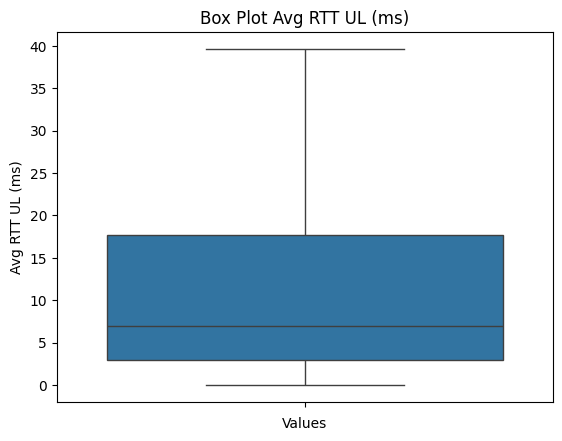

In [16]:
sns.boxplot(data=xdr_data['Avg RTT UL (ms)'], orient='v')
plt.title('Box Plot Avg RTT UL (ms)')
plt.xlabel('Values')
plt.ylabel('Avg RTT UL (ms)')
plt.show()

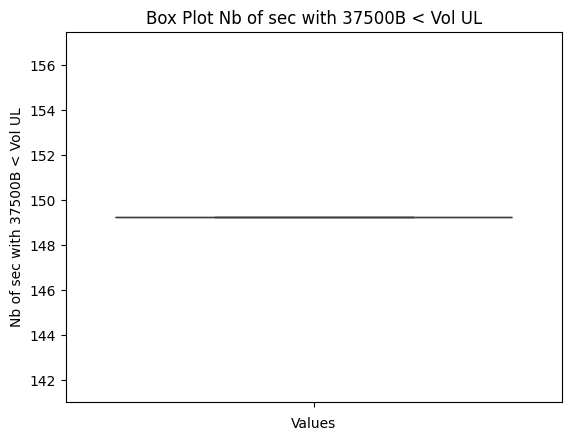

In [17]:
sns.boxplot(data=xdr_data['Nb of sec with 37500B < Vol UL'], orient='v')
plt.title('Box Plot Nb of sec with 37500B < Vol UL')
plt.xlabel('Values')
plt.ylabel('Nb of sec with 37500B < Vol UL')
plt.show()

### User overview analysis

In [18]:
# User overview analysis
top_handsets = xdr_data['Handset Type'].value_counts().head(5)
top_manufacturers = xdr_data['Handset Manufacturer'].value_counts().head(3)

### Top Five handset types

In [19]:
print(top_handsets)

Handset Type
Huawei B528S-23A           20324
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
undefined                   8987
Apple iPhone 7 (A1778)      6326
Name: count, dtype: int64


<Axes: xlabel='Handset Type'>

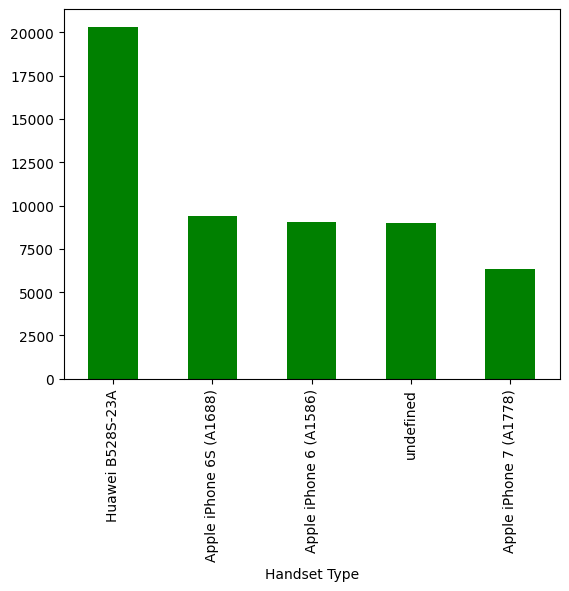

In [20]:
top_handsets.plot(kind='bar',color='green')

#### Top three handset manufacturers

In [21]:
top_manufacturers.head()

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64

<Axes: xlabel='Handset Manufacturer'>

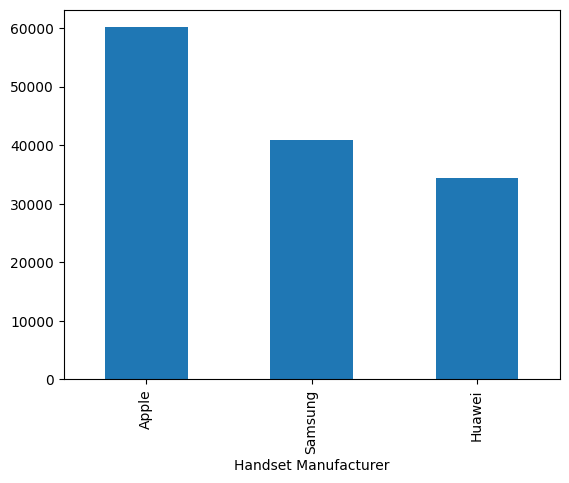

In [22]:
top_manufacturers.plot(kind='bar')

### The top 5 handset type per top 3 handset manufacturer

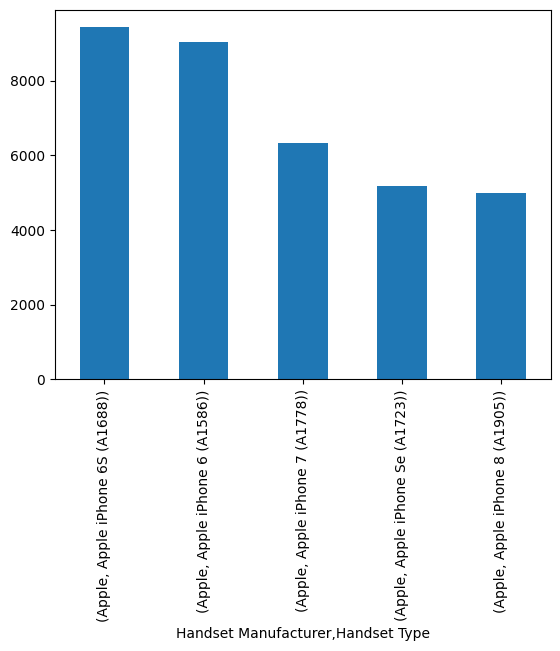

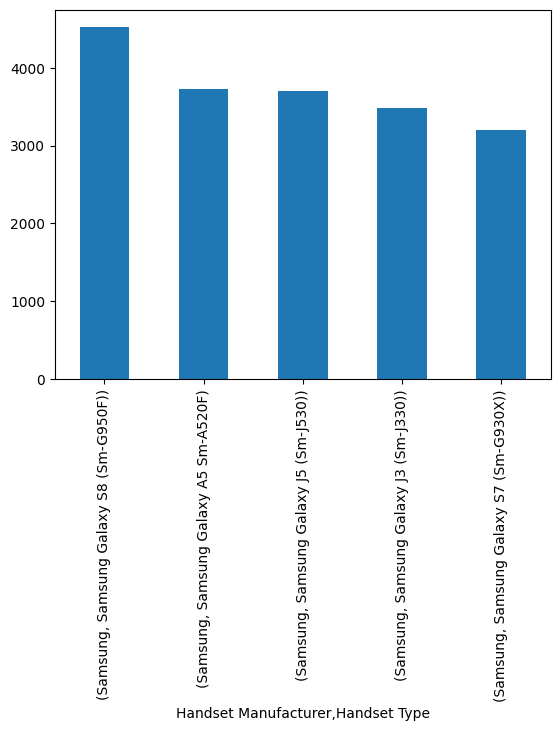

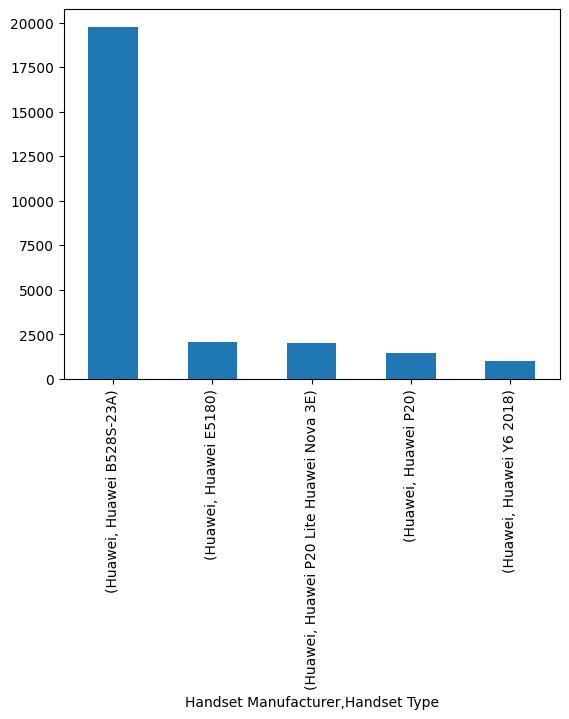

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for top manufacturers
filtered_data = xdr_data[xdr_data['Handset Manufacturer'].isin(top_manufacturers.index)]

# Group by 'Handset Manufacturer' and get the top 5 handsets for each manufacturer
for h_manufacturer in top_manufacturers.index:
    top_5_handsets_per_manufacturer = filtered_data[filtered_data['Handset Manufacturer']==h_manufacturer].groupby('Handset Manufacturer')['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer.plot(kind='bar')
    plt.show()

### Aggregate Each Application per User

In [24]:
def aggregate_xdr_data(xdr_data):
    """Aggregates xDR data per user and application.

    Args:
        The xDR data.

    Returns:
        The aggregated xDR data.

    """
    xdr_data['Total_DL_and_UL_data'] = xdr_data['Total DL (Bytes)'] + xdr_data['Total UL (Bytes)']
    xdr_data['Social Media Data'] = xdr_data['Social Media DL (Bytes)']+xdr_data['Social Media UL (Bytes)']
    xdr_data['Google Data'] = xdr_data['Google DL (Bytes)']+xdr_data['Gaming UL (Bytes)']
    xdr_data['Email Data']=xdr_data['Email DL (Bytes)']+xdr_data['Email UL (Bytes)']
    xdr_data['YouTube Data']=xdr_data['Email DL (Bytes)']+xdr_data['Email UL (Bytes)']
    xdr_data['Netflix Data']=xdr_data['Netflix DL (Bytes)']+xdr_data['Netflix UL (Bytes)']
    xdr_data['Gaming Data']=xdr_data['Gaming DL (Bytes)']+xdr_data['Gaming UL (Bytes)']
    xdr_data['Other Data'] = xdr_data['Other DL (Bytes)']+xdr_data['Other UL (Bytes)']

    columns = ['IMSI', 'Dur. (ms)','Bearer Id','Other Data','Gaming Data','Netflix Data','YouTube Data','Email Data', 'Google Data','Social Media Data', 'Total_DL_and_UL_data']

    df = xdr_data[columns]

    # Aggregate data
    aggregated_df = df.groupby('IMSI').agg(
        Total_DL_And_UL=('Total_DL_and_UL_data', sum),
        Total_Social_Media_Data=('Social Media Data',sum),
        Total_Google_Data=('Total_DL_and_UL_data', sum),
        Total_Email_Data=('Social Media Data',sum),
        Total_YouTube_Data=('Total_DL_and_UL_data', sum),
        Total_Netflix_Data=('Social Media Data',sum),
        Total_Gaming_Data=('Total_DL_and_UL_data', sum),
        Total_Other_Data=('Social Media Data',sum),
        Total_Duration_Data=('Dur. (ms)',sum),
        Total_xDR_Sessions=('Bearer Id',sum)
    )

    return aggregated_df


In [25]:
aggregated_xdr_data=pd.DataFrame(aggregate_xdr_data(xdr_data))
aggregated_xdr_data.head()


/tmp/ipykernel_49345/3463271779.py:25: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregated_df = df.groupby('IMSI').agg(


,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
IMSI,,,,,,,,,,
2.040471e+14,1.391536e+08,1546088.0,1.391536e+08,1546088.0,1.391536e+08,1546088.0,1.391536e+08,1546088.0,869844.0,7.277826e+18
2.040808e+14,2.321240e+08,715224.0,2.321240e+08,715224.0,2.321240e+08,715224.0,2.321240e+08,715224.0,877385.0,7.277826e+18
2.082001e+14,8.517164e+07,3122781.0,8.517164e+07,3122781.0,8.517164e+07,3122781.0,8.517164e+07,3122781.0,86019.0,6.917538e+18
2.082001e+14,4.265016e+08,2577104.0,4.265016e+08,2577104.0,4.265016e+08,2577104.0,4.265016e+08,2577104.0,86254.0,6.917538e+18
2.082001e+14,1.033092e+09,3426716.0,1.033092e+09,3426716.0,1.033092e+09,3426716.0,1.033092e+09,3426716.0,573923.0,2.622897e+19


### Exploratory Data Analysis (EDA) on Aggregated Data

In [26]:
aggregated_xdr_data.describe()

,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
count,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05
mean,6.932783e+08,2.556629e+06,6.932783e+08,2.556629e+06,6.932783e+08,2.556629e+06,6.932783e+08,2.556629e+06,1.462848e+05,1.417822e+19
std,9.893354e+08,3.732520e+06,9.893354e+08,3.732520e+06,9.893354e+08,3.732520e+06,9.893354e+08,3.732520e+06,2.186617e+05,2.050989e+19
min,3.324901e+07,1.563000e+03,3.324901e+07,1.563000e+03,3.324901e+07,1.563000e+03,3.324901e+07,1.563000e+03,7.142000e+03,6.917538e+18
25%,3.584920e+08,1.210664e+06,3.584920e+08,1.210664e+06,3.584920e+08,1.210664e+06,3.584920e+08,1.210664e+06,7.041275e+04,7.349883e+18
50%,6.176314e+08,2.302916e+06,6.176314e+08,2.302916e+06,6.176314e+08,2.302916e+06,6.176314e+08,2.302916e+06,1.024505e+05,1.304243e+19
75%,8.571697e+08,3.306601e+06,8.571697e+08,3.306601e+06,8.571697e+08,3.306601e+06,8.571697e+08,3.306601e+06,1.727990e+05,1.462771e+19
max,2.820181e+11,1.053244e+09,2.820181e+11,1.053244e+09,2.820181e+11,1.053244e+09,2.820181e+11,1.053244e+09,3.761205e+07,5.767460e+21


### Segment Users and Calculate Total Data per Decile Class

In [27]:
import pandas as pd

def segment_users_and_calculate_total_data(data):
  """
  Segments users into the top five decile classes based on total session duration and calculates the total data (DL+UL) per decile class.

  Args:
    data: The input DataFrame containing user information data.

  Returns:
    A DataFrame with decile class and total data per decile class.
  """

  # Calculate total data per user
  data['total_data'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

  # Segment users into top five decile classes based on total session duration
  decile_labels = ['Decile 1', 'Decile 2', 'Decile 3', 'Decile 4', 'Decile 5']
  data['decile_class'] = pd.qcut(data['Dur. (ms)'], 5, labels=decile_labels)

  # Calculate total data per decile class
  total_data_per_decile = data.groupby('decile_class')['total_data'].sum()

  return total_data_per_decile

total_data_per_decile = segment_users_and_calculate_total_data(xdr_data)
print(total_data_per_decile)

decile_class
Decile 1    1.488404e+13
Decile 2    2.361997e+13
Decile 3    6.089083e+12
Decile 4    1.485375e+13
Decile 5    1.491834e+13
Name: total_data, dtype: float64


/tmp/ipykernel_49345/2239284812.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data_per_decile = data.groupby('decile_class')['total_data'].sum()


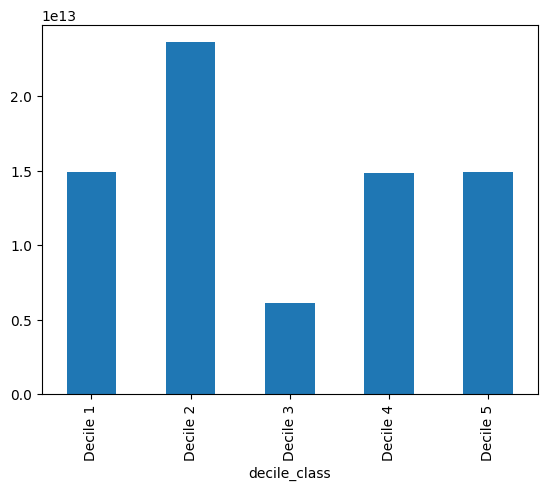

In [28]:
total_data_per_decile.plot(kind='bar')
plt.show()

In [29]:
xdr_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Total DL (Bytes),Total_DL_and_UL_data,Social Media Data,Google Data,Email Data,YouTube Data,Netflix Data,Gaming Data,Other Data,total_data
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,72.862020,12.037797,13300.045927,...,4.546434e+08,4.957646e+08,1.828250e+06,1.403915e+07,2.259102e+06,2.259102e+06,2.262861e+07,4.303331e+08,4.293653e+08,4.957646e+08
std,2.883600e+18,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,51.361714,11.040917,23971.798635,...,2.441421e+08,2.443810e+08,1.035646e+06,5.811980e+06,1.071109e+06,1.071109e+06,9.260820e+06,2.440199e+08,2.432681e+08,2.443810e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,7.114041e+06,2.895611e+07,1.563000e+03,2.370800e+04,8.359000e+03,8.359000e+03,9.843200e+04,3.063580e+05,1.490450e+05,2.895611e+07
25%,7.349883e+18,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,...,2.431072e+08,2.844764e+08,9.322180e+05,9.774338e+06,1.359344e+06,1.359344e+06,1.597946e+07,2.187279e+08,2.185534e+08,2.844764e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,...,4.558409e+08,4.968610e+08,1.826471e+06,1.403358e+07,2.263567e+06,2.263567e+06,2.263554e+07,4.316150e+08,4.299865e+08,4.968610e+08
75%,1.304243e+19,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,6.657051e+08,7.065054e+08,2.727487e+06,1.831082e+07,3.159818e+06,3.159818e+06,2.929044e+07,6.414159e+08,6.399275e+08,7.065054e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,221.989265,39.657207,378160.000000,...,9.029696e+08,9.559848e+08,3.650861e+06,2.795925e+07,4.518036e+06,4.518036e+06,4.519815e+07,8.592028e+08,8.595209e+08,9.559848e+08


### Non-Graphical Univariate Analysis: Dispersion Parameters

In [30]:
import pandas as pd

def compute_dispersion_parameters(data):
  """
  Computes various dispersion parameters for a DataFrame.

  Args:
    data : The input DataFrame.

  Returns:
    A DataFrame containing dispersion parameters for each numeric column.
  """

  numeric_columns = data.select_dtypes(include='number').columns

  dispersion_params = pd.DataFrame(index=['Range', 'Variance', 'Std Dev', 'IQR', 'Coef Var'], columns=numeric_columns)

  for column in numeric_columns:
    dispersion_params.loc['Range', column] = data[column].max() - data[column].min()
    dispersion_params.loc['Variance', column] = data[column].var()
    dispersion_params.loc['Std Dev', column] = data[column].std()
    dispersion_params.loc['IQR', column] = data[column].quantile(0.75) - data[column].quantile(0.25)
    dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()

  return dispersion_params
dispersion_results = compute_dispersion_parameters(xdr_data)

In [31]:
dispersion_results.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Total DL (Bytes),Total_DL_and_UL_data,Social Media Data,Google Data,Email Data,YouTube Data,Netflix Data,Gaming Data,Other Data,total_data
Range,6269003648590669824.0,999.0,999.0,1852194.0,10027194860177.0,882363507487729.0,98561186125774.0,221.989265,39.657207,378160.0,...,895855575.0,927028669.0,3649298.0,27935542.0,4509677.0,4509677.0,45099721.0,858896426.0,859371889.0,927028669.0
Variance,8315146431338349632234442312803942400.0,83296.235554,82999.704445,6567052314.333345,459983443424385499136.0,5947410209613010832457728.0,500577558786728881719083008.0,2638.025639,121.901858,574647129.800257,...,59605345737093104.0,59722066827428720.0,1072562923162.849976,33779117033043.382812,1147274619738.224365,1147274619738.224365,85762788668859.734375,59545723318985112.0,59179355483010488.0,59722066827428720.0
Std Dev,2883599561544277504.0,288.610872,288.096693,81037.351353,21447224608.894867,2438731270479.183105,22373590654759.214844,51.361714,11.040917,23971.798635,...,244142060.565346,244380987.041604,1035646.138004,5811980.474248,1071109.060618,1071109.060618,9260820.086194,244019924.02053,243268073.291607,244380987.041604
IQR,5692542731480581120.0,499.0,499.0,74988.0,370342358.0,33222169.0,50657094738467.0,74.795706,14.662883,19667.0,...,422597965.0,422028969.0,1795269.0,8536487.0,1800474.0,1800474.0,13310990.0,422687939.0,421374078.0,422028969.0
Coef Var,0.28441,0.57816,0.577579,0.774672,0.000103,58.227486,0.461553,0.704918,0.917188,1.802385,...,0.536997,0.492938,0.566468,0.413984,0.47413,0.47413,0.409253,0.567049,0.566576,0.492938


### Graphical Univariate Analysis

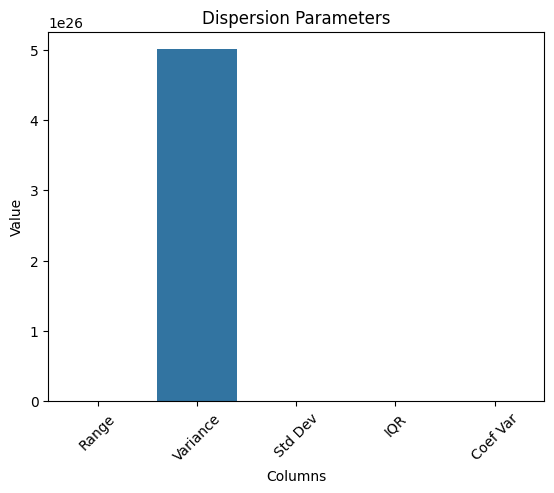

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=dispersion_results['IMEI'])
plt.title('Dispersion Parameters')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()



### Bivariate Analysis: Relationship Between Each Application and Total Data DL and UL

In [33]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total_DL_and_UL_data,Social Media Data,Google Data,Email Data,YouTube Data,Netflix Data,Gaming Data,Other Data,total_data,decile_class
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,345629377.0,1570185.0,15978629.0,3701304.0,3701304.0,17855187.0,292426453.0,180558843.0,345629377.0,Decile 5
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,707185356.0,1933278.0,4664633.0,937385.0,937385.0,35565545.0,609920783.0,541959383.0,707185356.0,Decile 5
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,307690973.0,1726277.0,8930685.0,3363124.0,3363124.0,23751202.0,229980251.0,414908351.0,307690973.0,Decile 5
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,889352748.0,657493.0,19873456.0,2070983.0,2070983.0,15092588.0,810387875.0,761837216.0,889352748.0,Decile 5
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,607681403.0,912788.0,9778085.0,2110349.0,2110349.0,17539799.0,531237049.0,564619822.0,607681403.0,Decile 5


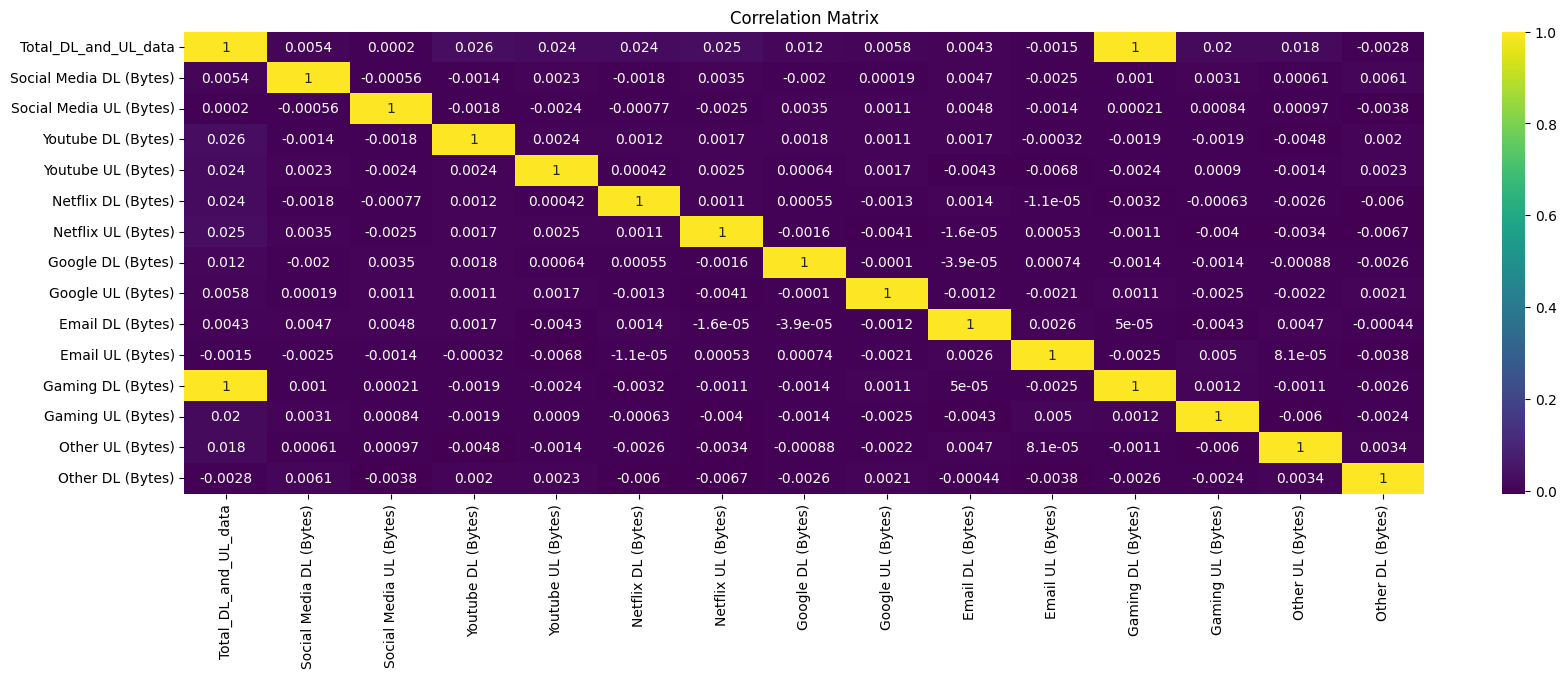

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = xdr_data[['Total_DL_and_UL_data','Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)', 'Other DL (Bytes)']].corr()
plt.figure(figsize=(20,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')

plt.show()

### Correlation Analysis: Computing a Correlation Matrix

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

xdr_data['Social Media Data'] = xdr_data['Social Media DL (Bytes)']+xdr_data['Social Media UL (Bytes)']
xdr_data['Google Data'] = xdr_data['Google DL (Bytes)']+xdr_data['Gaming UL (Bytes)']
xdr_data['Email Data']=xdr_data['Email DL (Bytes)']+xdr_data['Email UL (Bytes)']
xdr_data['YouTube Data']=xdr_data['Email DL (Bytes)']+xdr_data['Email UL (Bytes)']
xdr_data['Netflix Data']=xdr_data['Netflix DL (Bytes)']+xdr_data['Netflix UL (Bytes)']
xdr_data['Gaming Data']=xdr_data['Gaming DL (Bytes)']+xdr_data['Gaming UL (Bytes)']
xdr_data['Other Data'] = xdr_data['Other DL (Bytes)']+xdr_data['Other UL (Bytes)']

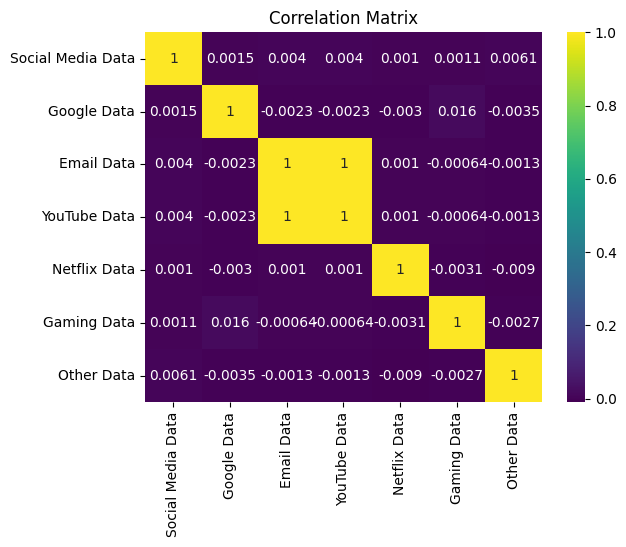

In [36]:
correlation_matrix = xdr_data[['Social Media Data', 'Google Data', 'Email Data', 'YouTube Data', 'Netflix Data', 'Gaming Data', 'Other Data']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

### Principal Component Analysis (PCA) for Dimensionality Reduction

In [37]:
import pandas as pd
from sklearn.decomposition import PCA


# Select only the desired columns
data_selected = xdr_data[['Social Media Data', 'Google Data', 'Email Data', 'YouTube Data', 'Netflix Data', 'Gaming Data', 'Other Data']]

data_standardized = (data_selected - data_selected.mean()) / data_selected.std()

# Perform PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(data_standardized)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the original DataFrame with the principal components
final_df = pd.concat([principal_df, xdr_data], axis=1)

In [38]:
principal_df.head(10)

,PC1,PC2
0,1.903229,0.067314
1,-1.738618,-0.904089
2,1.461045,-1.183910
3,-0.263278,1.653893
4,-0.201224,-0.250238
5,0.847247,2.031420
6,-0.224168,-1.209967
7,1.641102,1.405646
8,1.471625,1.279439
9,-1.970841,0.979452


In [39]:
final_df.head()

,PC1,PC2,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Total_DL_and_UL_data,Social Media Data,Google Data,Email Data,YouTube Data,Netflix Data,Gaming Data,Other Data,total_data,decile_class
0,1.903229,0.067314,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,...,345629377.0,1570185.0,15978629.0,3701304.0,3701304.0,17855187.0,292426453.0,180558843.0,345629377.0,Decile 5
1,-1.738618,-0.904089,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,...,707185356.0,1933278.0,4664633.0,937385.0,937385.0,35565545.0,609920783.0,541959383.0,707185356.0,Decile 5
2,1.461045,-1.183910,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,...,307690973.0,1726277.0,8930685.0,3363124.0,3363124.0,23751202.0,229980251.0,414908351.0,307690973.0,Decile 5
3,-0.263278,1.653893,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,...,889352748.0,657493.0,19873456.0,2070983.0,2070983.0,15092588.0,810387875.0,761837216.0,889352748.0,Decile 5
4,-0.201224,-0.250238,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,...,607681403.0,912788.0,9778085.0,2110349.0,2110349.0,17539799.0,531237049.0,564619822.0,607681403.0,Decile 5
